In [1]:
#!pip install currencyconverter

import numpy as np
import pandas as pd

# Model Set-up and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
merged = pd.read_csv('merged_table.csv')
merged.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
merged.isna().sum()

watch_id               0
case_diameter          0
watch_movement         0
watch_case            23
watch_dial             0
watch_markers         70
watch_strap            0
condition              0
price                  0
aftermarket_price      0
box_and_papers         0
seller_id              0
seller_rating        101
dtype: int64

In [4]:
merged['watch_markers'].value_counts()

Roman Numerals     461
Batons             376
Arabic Numerals     22
Name: watch_markers, dtype: int64

In [5]:
merged['watch_case'].value_counts()

Stainless Steel              663
18ct Rose Gold               111
Ceramic & Stainless Steel     80
Titanium                      29
Ceramic & 18ct Rose Gold      23
Name: watch_case, dtype: int64

In [6]:
merged = merged[~merged['aftermarket_price'].str.contains('Price on request')]

In [7]:
merged['final_aftermarket'] = merged['aftermarket_price']
merged['final_aftermarket'] = merged['final_aftermarket'].str.replace(',', '')
merged['final_aftermarket'] = merged['final_aftermarket'].str.replace('$', '')
merged['final_aftermarket'] = merged['final_aftermarket'].str.replace('£', '')
merged['final_aftermarket'] = merged['final_aftermarket'].astype(int)

<ipython-input-7-a8cbcfca6deb>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  merged['final_aftermarket'] = merged['final_aftermarket'].str.replace('$', '')


In [8]:
merged['final_aftermarket'] = np.where(
    merged['aftermarket_price'].str.startswith('$'),                # Condition (price < 1).
    merged['final_aftermarket'] * 0.78,  # What to assign to price when condition is true. 
    merged['aftermarket_price']                     # What to assign to price when condition is false.
)

In [9]:
merged['final_aftermarket'] = merged['final_aftermarket'].astype(str)
merged['final_aftermarket'] = merged['final_aftermarket'].str.replace('£', '')
merged['final_aftermarket'] = merged['final_aftermarket'].str.replace(',', '')
merged['final_aftermarket'] = merged['final_aftermarket'].astype(float)

In [10]:
merged

,watch_id,case_diameter,watch_movement,watch_case,watch_dial,watch_markers,watch_strap,condition,price,aftermarket_price,box_and_papers,seller_id,seller_rating,final_aftermarket
0,W344,39.8 x 44 mm,Automatic,Stainless Steel,Grey,Roman Numerals,Stainless Steel,Very good,"£6,600.00","$6,795","Original box, original papers",S344,NaN,5300.10
2,W841,33 mm,Quartz,Stainless Steel,Silver,Arabic Numerals,Stainless Steel,New,"£21,000.00","£33,984","Original box, original papers",S841,4.60,33984.00
3,W901,37 mm,Automatic,18ct Rose Gold,Silver,Batons,Rubber,New,"£44,700.00","£68,747","Original box, original papers",S901,4.56,68747.00
4,W287,39.8 mm,Automatic,Stainless Steel,Silver,Roman Numerals,Stainless Steel,Very good,"£9,450.00","$9,300","Original box, original papers",S287,4.95,7254.00
5,W318,20 x 25 mm,Quartz,Stainless Steel,Silver,Roman Numerals,Bicoloured,Very good,"£5,100.00","$2,051","No original box, no original pa...",S318,4.91,1599.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,W725,43 mm,Automatic,Ceramic & 18ct Rose Gold,Black,Batons,Rubber,Good,"£51,100.00","£65,460","Original box, original papers",S725,4.91,65460.00
924,W146,35.1 x 8.83 mm,Automatic,Stainless Steel,Silver,Roman Numerals,Stainless Steel,Very good,"£5,700.00","$6,500","Original box, original papers",S146,NaN,5070.00
925,W202,20 mm,Quartz,Stainless Steel,Silver,Roman Numerals,Stainless Steel,Very good,"£2,970.00","$3,200","No original box, no original pa...",S202,4.83,2496.00
926,W4,39.8 mm,Automatic,Stainless Steel,Black,Roman Numerals,Rubber,Good,"£6,800.00","$7,300","Original box, original papers",S4,4.97,5694.00


In [11]:
new_merged = merged.dropna()
len(new_merged)

669

In [12]:
new_merged

,watch_id,case_diameter,watch_movement,watch_case,watch_dial,watch_markers,watch_strap,condition,price,aftermarket_price,box_and_papers,seller_id,seller_rating,final_aftermarket
2,W841,33 mm,Quartz,Stainless Steel,Silver,Arabic Numerals,Stainless Steel,New,"£21,000.00","£33,984","Original box, original papers",S841,4.60,33984.00
3,W901,37 mm,Automatic,18ct Rose Gold,Silver,Batons,Rubber,New,"£44,700.00","£68,747","Original box, original papers",S901,4.56,68747.00
4,W287,39.8 mm,Automatic,Stainless Steel,Silver,Roman Numerals,Stainless Steel,Very good,"£9,450.00","$9,300","Original box, original papers",S287,4.95,7254.00
5,W318,20 x 25 mm,Quartz,Stainless Steel,Silver,Roman Numerals,Bicoloured,Very good,"£5,100.00","$2,051","No original box, no original pa...",S318,4.91,1599.78
6,W391,30.4 x 25 mm,Quartz,Stainless Steel,Silver,Roman Numerals,Stainless Steel,New,"£3,500.00","$4,226","Original box, original papers",S391,4.89,3296.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,W376,25 mm,Quartz,Stainless Steel,Silver,Roman Numerals,Stainless Steel,Very good,"£3,500.00","$3,440","No original box, no original pa...",S376,4.83,2683.20
923,W725,43 mm,Automatic,Ceramic & 18ct Rose Gold,Black,Batons,Rubber,Good,"£51,100.00","£65,460","Original box, original papers",S725,4.91,65460.00
925,W202,20 mm,Quartz,Stainless Steel,Silver,Roman Numerals,Stainless Steel,Very good,"£2,970.00","$3,200","No original box, no original pa...",S202,4.83,2496.00
926,W4,39.8 mm,Automatic,Stainless Steel,Black,Roman Numerals,Rubber,Good,"£6,800.00","$7,300","Original box, original papers",S4,4.97,5694.00


In [13]:
new_merged['price'] = new_merged['price'].str.replace(',', '')
new_merged['price'] = new_merged['price'].str.replace('£', '')
new_merged['price'] = new_merged['price'].astype(float)

<ipython-input-13-d58975c72bfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merged['price'] = new_merged['price'].str.replace(',', '')
<ipython-input-13-d58975c72bfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merged['price'] = new_merged['price'].str.replace('£', '')
<ipython-input-13-d58975c72bfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [14]:
new_merged.drop(columns=['watch_id', 'aftermarket_price', 'seller_id'], inplace = True)

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
ff = pd.get_dummies(new_merged, drop_first = True)
ff

,price,seller_rating,final_aftermarket,case_diameter_ 20 mm,case_diameter_ 20 x 25 mm,case_diameter_ 20 x 32 mm,case_diameter_ 20 x 32.2 mm,case_diameter_ 20 x 32.3 mm,case_diameter_ 20.3 x 25.2 mm,case_diameter_ 20.5 mm,...,watch_strap_Rubber,watch_strap_Stainless Steel,condition_ Fair,condition_ Good,condition_ New,condition_ Unworn,condition_ Very good,"box_and_papers_ Original box, no original papers","box_and_papers_ Original box, original papers","box_and_papers_ Original papers, no original box"
2,21000.0,4.60,33984.00,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,44700.0,4.56,68747.00,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,9450.0,4.95,7254.00,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
5,5100.0,4.91,1599.78,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,3500.0,4.89,3296.28,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,3500.0,4.83,2683.20,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
923,51100.0,4.91,65460.00,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
925,2970.0,4.83,2496.00,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
926,6800.0,4.97,5694.00,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


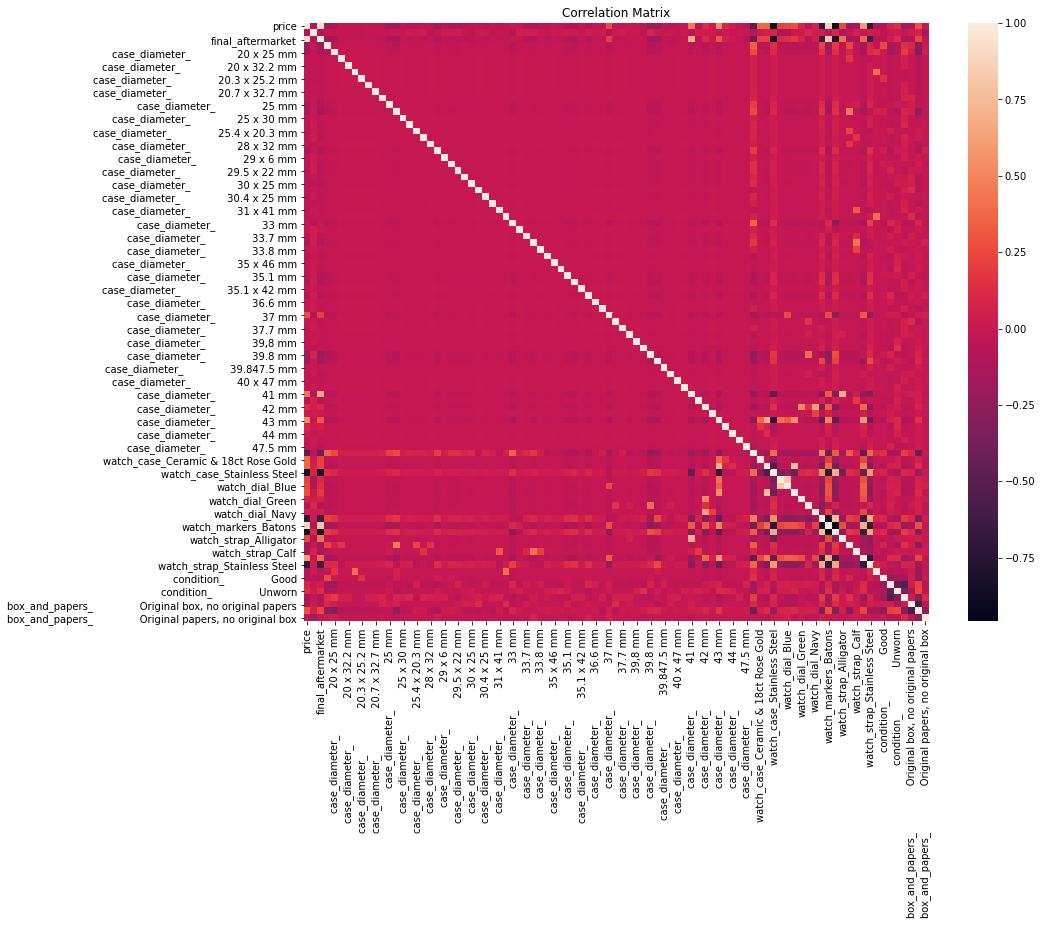

In [16]:
plt.figure(figsize=(14,11))
sns.heatmap(ff.corr())
plt.title('Correlation Matrix')
plt.show();

In [17]:
ff.columns

Index(['price', 'seller_rating', 'final_aftermarket',
       'case_diameter_               20 mm',
       'case_diameter_               20 x 25 mm',
       'case_diameter_               20 x 32 mm',
       'case_diameter_               20 x 32.2 mm',
       'case_diameter_               20 x 32.3 mm',
       'case_diameter_               20.3 x 25.2 mm',
       'case_diameter_               20.5 mm',
       'case_diameter_               20.7 x 32.7 mm',
       'case_diameter_               22 x 29.5 mm',
       'case_diameter_               25 mm',
       'case_diameter_               25 x 20 mm',
       'case_diameter_               25 x 30 mm',
       'case_diameter_               25,35 x 20,3 mm',
       'case_diameter_               25.4 x 20.3 mm',
       'case_diameter_               25.5 mm',
       'case_diameter_               28 x 32 mm',
       'case_diameter_               29 mm',
       'case_diameter_               29 x 6 mm',
       'case_diameter_               29.5 mm'

In [18]:
x = ff.drop(['final_aftermarket'], axis=1)
y = ff['final_aftermarket']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [20]:
# Regression Tree

RF = RandomForestRegressor()
RF_model = RF.fit(x_train, y_train)
RF_model_prediction = RF.predict(x_train)

RF_model_score = r2_score(y_train, RF_model_prediction)
print(RF_model_score)

0.9925748146723554


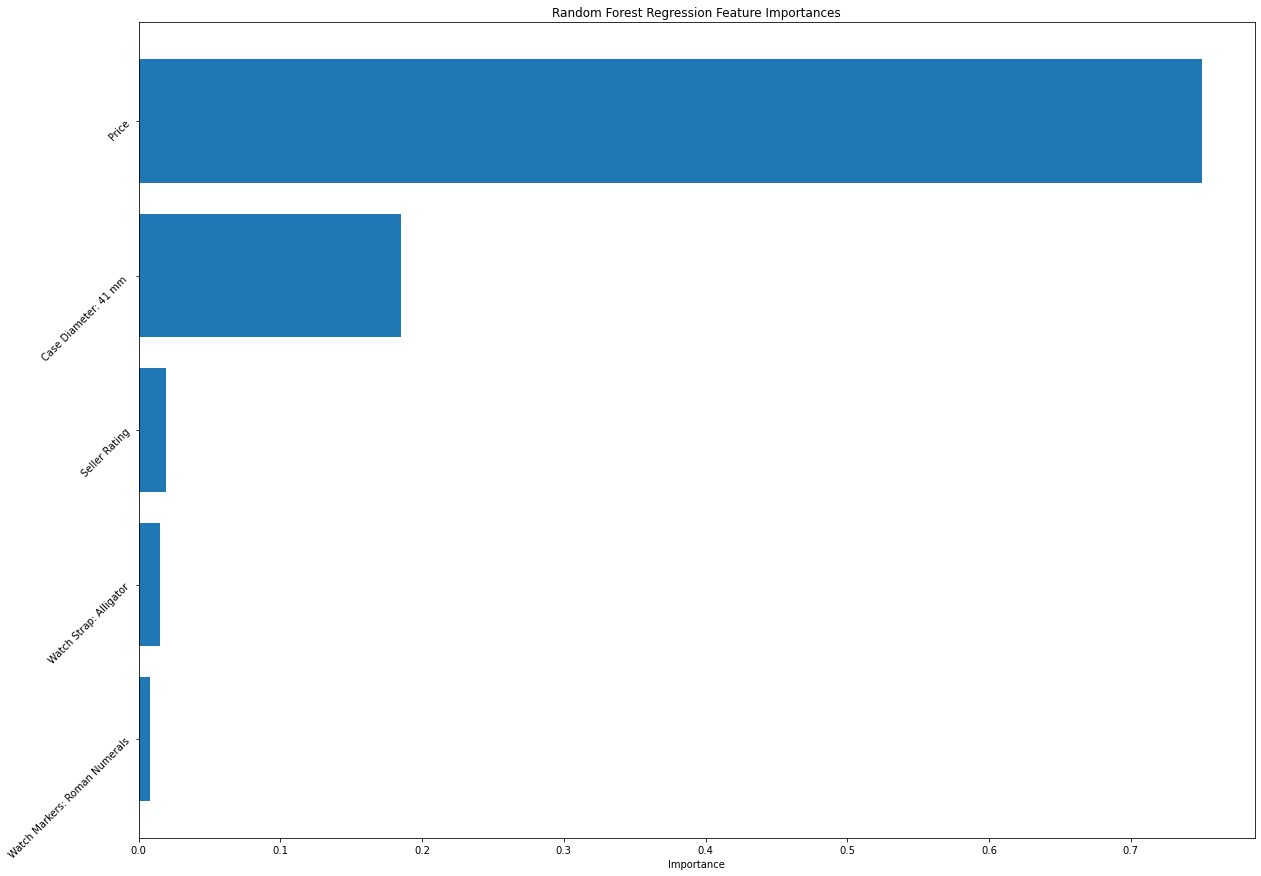

In [28]:
# Getting the feature importances ready

# Getting feature names
feature_names = x_train.columns

# Getting feature importances:
RF_importances = RF.feature_importances_

# Dataframe ready:
feature_importances_df = pd.DataFrame({'Features': feature_names,  
                                       'RF_importances': RF_importances})

# Organise by ada_importances
feature_importances_df.sort_values(by='RF_importances', ascending = True, inplace=True)

# Extract values from organised dataframe
feature_names = feature_importances_df.Features.tolist()[-5:]
RF_importances = feature_importances_df.RF_importances.tolist()[-5:]


# Plotting
y_pos = np.arange(len(feature_names))

fig, axes = plt.subplots(figsize=(20,15))
ax1 = axes

ax1.barh(y_pos, RF_importances)
ax1.set_yticks(np.arange(len(feature_names)))
ax1.set_yticklabels(['Watch Markers: Roman Numerals','Watch Strap: Alligator', 'Seller Rating','Case Diameter: 41 mm ','Price'], rotation=45)
ax1.set_title('Random Forest Regression Feature Importances')
ax1.set_xlabel('Importance')


plt.show();